In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

#Visualization Tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# AI Workflow Module
from model_classifier import ModelClassifier, CustomClassifier

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Use for saving model 
import joblib

# Environment Parameters

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Preparation

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled_v0.csv',index_col=0)
train_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled_v0.csv',index_col=0)
test_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [4]:
# Get genes
features_df = pd.read_csv('../data/skcm_ppi_betweenness_centrality.csv',index_col=0)
features_df.head(10)

,betweenness_centrality
PC,0.088636
RPN2,0.063636
TSHR,0.049026
GSR,0.039610
RPS28,0.037013
GRIK5,0.018506
GNG2,0.012987
C7,0.012987
S100A7,0.010390
SERPINB4,0.007792


### Feature Selection

In [5]:
top10_features = features_df.betweenness_centrality.head(10).index.values
top20_features = features_df.betweenness_centrality.head(20).index.values
top30_features = features_df.betweenness_centrality.head(30).index.values
top40_features = features_df.betweenness_centrality.head(40).index.values
top50_features = features_df.betweenness_centrality.head(50).index.values

## Model Development

In [6]:
# Logistic Regression

lr_pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    }
]

# Support Vector Machines - Linear Kernel

svm_linear_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    }
]

# Support Vector Machines - Polynomial Kernel

svm_poly_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Radial Basis Kernel


svm_rbf_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Sigmoid Kernel


svm_sigmoid_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Naive Bayes

gnb_pipeline_params = [
    {   
        'clf__estimator': [GaussianNB(priors = None)], 
    },
]

# Random Forest

rf_pipeline_params = [
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]  
    },
]

# All Models in one pipeline without PCA

pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

# All Models in one pipeline with PCA


pca_pipeline_params = [
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],        
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': [10.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': [0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [RandomForestClassifier(random_state=1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

### Model Performance [Without PCA]

#### Logistic Regression

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.896):
{'clf__estimator': LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear'), 'clf__estimator__C': 1, 'clf__estimator__penalty': 'l1'}

Training Performance:
AUC score: 0.876753912574204
LogLoss score: 0.3618042501642461
Accuracy: 0.8461538461538461
f1 macro: 0.7199323422060002
f1 micro: 0.8461538461538461
f1 weighted: 0.8185428921652549
Precision macro: 0.8342833771732854
Precision micro: 0.8342833771732854
Precision weighted: 0.8342833771732854
Recall macro: 0.6815299514301134
Recall micro: 0.8461538461538461
Recall weighted: 0.8461538461538461

Validation Performance:
AUC score: 0.8994864269992663
LogLoss score: 0.3819263796516208
Accuracy: 0.8536585365853658
f1 macro: 0.7415966386554622
f1 micro: 0.8536585365853658
f1 weighted: 0.8315228530436566
Precision macro: 0.8445904294632888
Precision micro: 0.8445904294632888
Precision weighted: 0.8445904294632888
Recall macro: 0.70

['melanoma_ppi_lr_10_genes_classifier.pkl']

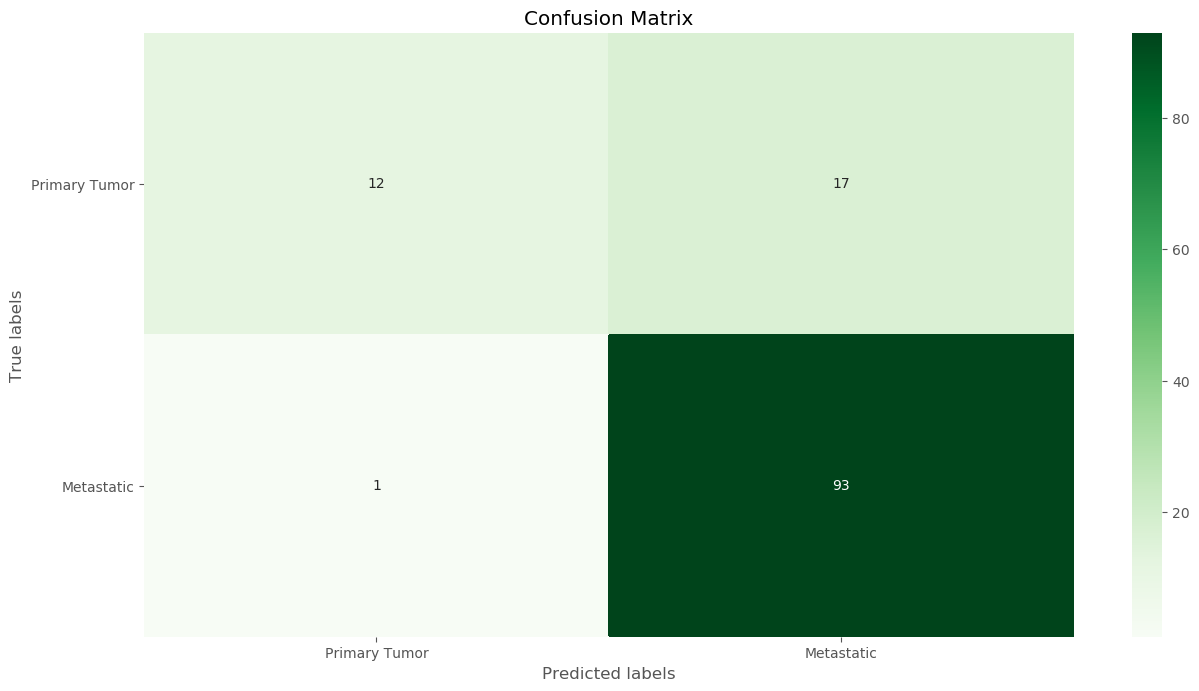

In [7]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top10_features, 
    label_binarizer = False)


grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_ppi_lr_10_genes_classifier.pkl', compress=9)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.883):
{'clf__estimator': LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear'), 'clf__estimator__C': 0.1, 'clf__estimator__penalty': 'l1'}

Training Performance:
AUC score: 0.843497031840259
LogLoss score: 0.4570257248838506
Accuracy: 0.7972027972027972
f1 macro: 0.5695006747638327
f1 micro: 0.7972027972027973
f1 weighted: 0.7337089361380859
Precision macro: 0.7898550724637681
Precision micro: 0.7898550724637681
Precision weighted: 0.7898550724637681
Recall macro: 0.5735294117647058
Recall micro: 0.7972027972027972
Recall weighted: 0.7972027972027972

Validation Performance:
AUC score: 0.9321349963316214
LogLoss score: 0.42828404560899247
Accuracy: 0.8211382113821138
f1 macro: 0.642063492063492
f1 micro: 0.8211382113821138
f1 weighted: 0.7758549490256806
Precision macro: 0.8103448275862069
Precision micro: 0.8103448275862069
Precision weighted: 0.8103448275862069
Recall macro: 

['melanoma_ppi_lr_20_genes_classifier.pkl']

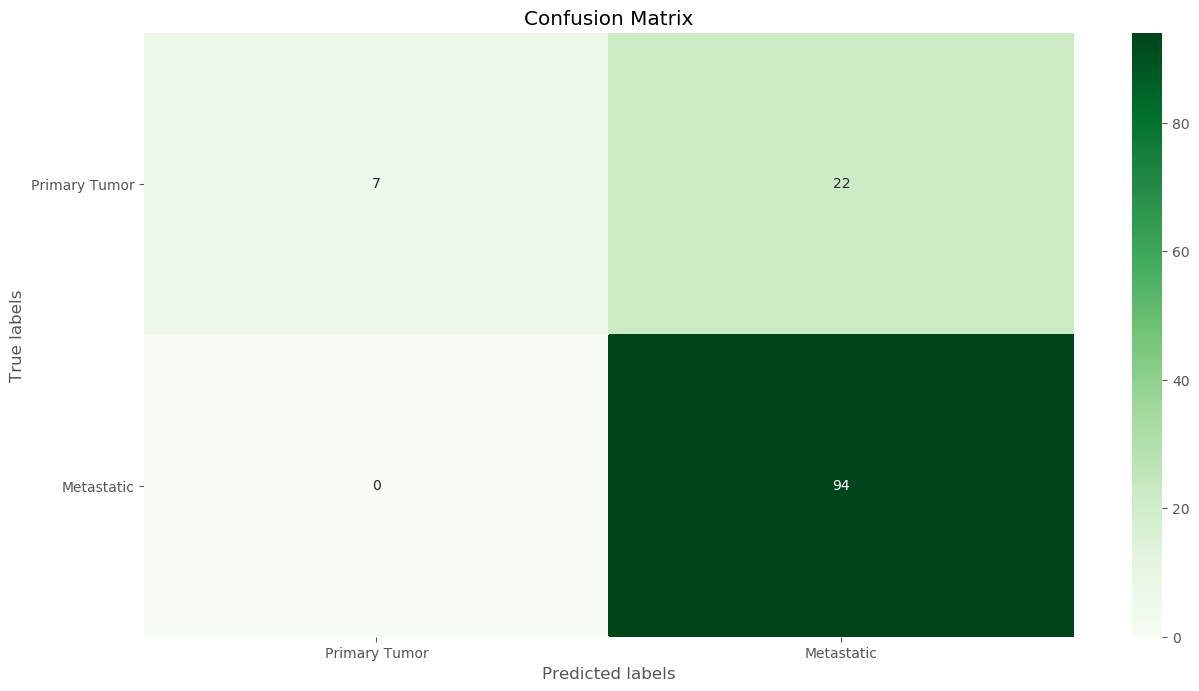

In [8]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top20_features, 
    label_binarizer = False)

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_ppi_lr_20_genes_classifier.pkl', compress=9)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.881):
{'clf__estimator': LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear'), 'clf__estimator__C': 0.1, 'clf__estimator__penalty': 'l1'}

Training Performance:
AUC score: 0.885456017269293
LogLoss score: 0.42684699818800975
Accuracy: 0.8111888111888111
f1 macro: 0.6304909560723514
f1 micro: 0.8111888111888111
f1 weighted: 0.7660143474096963
Precision macro: 0.8055689346939519
Precision micro: 0.8055689346939519
Precision weighted: 0.8055689346939519
Recall macro: 0.6130599028602267
Recall micro: 0.8111888111888111
Recall weighted: 0.8111888111888111

Validation Performance:
AUC score: 0.917461482024945
LogLoss score: 0.4181778753677802
Accuracy: 0.8211382113821138
f1 macro: 0.6576417004048583
f1 micro: 0.8211382113821138
f1 weighted: 0.7826684440933478
Precision macro: 0.815240943562851
Precision micro: 0.815240943562851
Precision weighted: 0.815240943562851
Recall macro: 0.6

['melanoma_ppi_lr_30_genes_classifier.pkl']

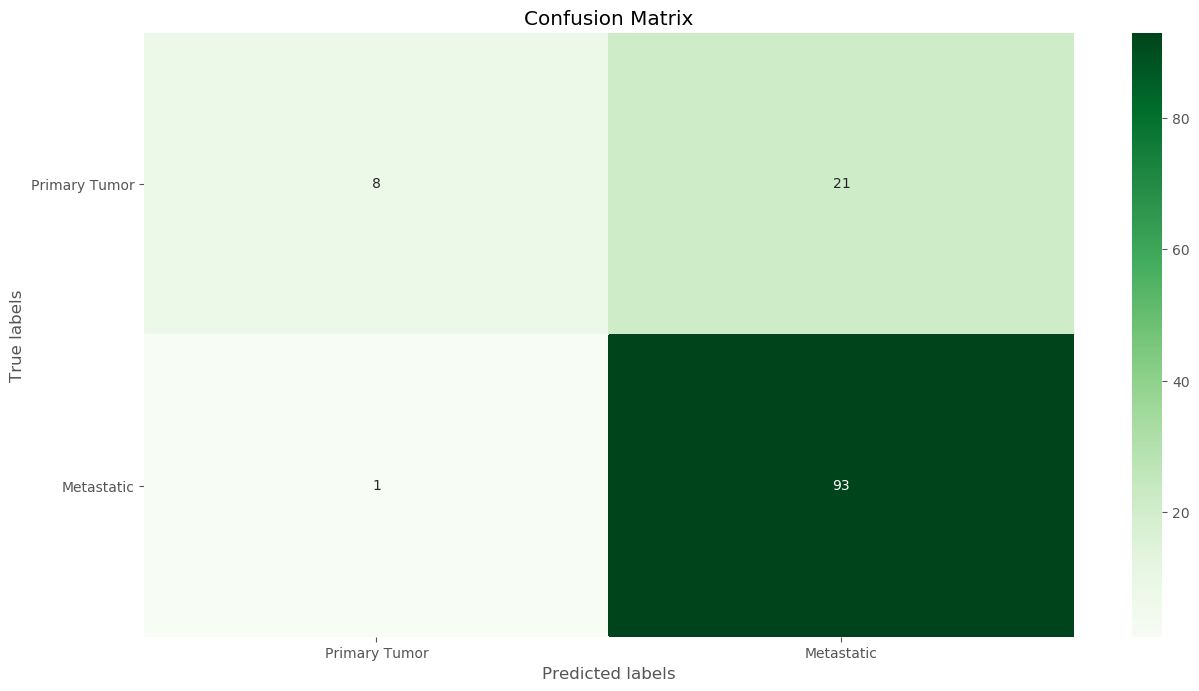

In [9]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top30_features, 
    label_binarizer = False)

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_ppi_lr_30_genes_classifier.pkl', compress=9)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.881):
{'clf__estimator': LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear'), 'clf__estimator__C': 0.1, 'clf__estimator__penalty': 'l1'}

Training Performance:
AUC score: 0.8813410685375067
LogLoss score: 0.41595384364697036
Accuracy: 0.8286713286713286
f1 macro: 0.6739944634424361
f1 micro: 0.8286713286713286
f1 weighted: 0.7917687263070751
Precision macro: 0.818608153141648
Precision micro: 0.818608153141648
Precision weighted: 0.818608153141648
Recall macro: 0.6447652455477604
Recall micro: 0.8286713286713286
Recall weighted: 0.8286713286713286

Validation Performance:
AUC score: 0.892516507703595
LogLoss score: 0.41052763004792875
Accuracy: 0.8292682926829268
f1 macro: 0.6800445930880713
f1 micro: 0.8292682926829268
f1 weighted: 0.795515313012662
Precision macro: 0.8223835175651699
Precision micro: 0.8223835175651699
Precision weighted: 0.8223835175651699
Recall macro: 0.

['melanoma_ppi_lr_40_genes_classifier.pkl']

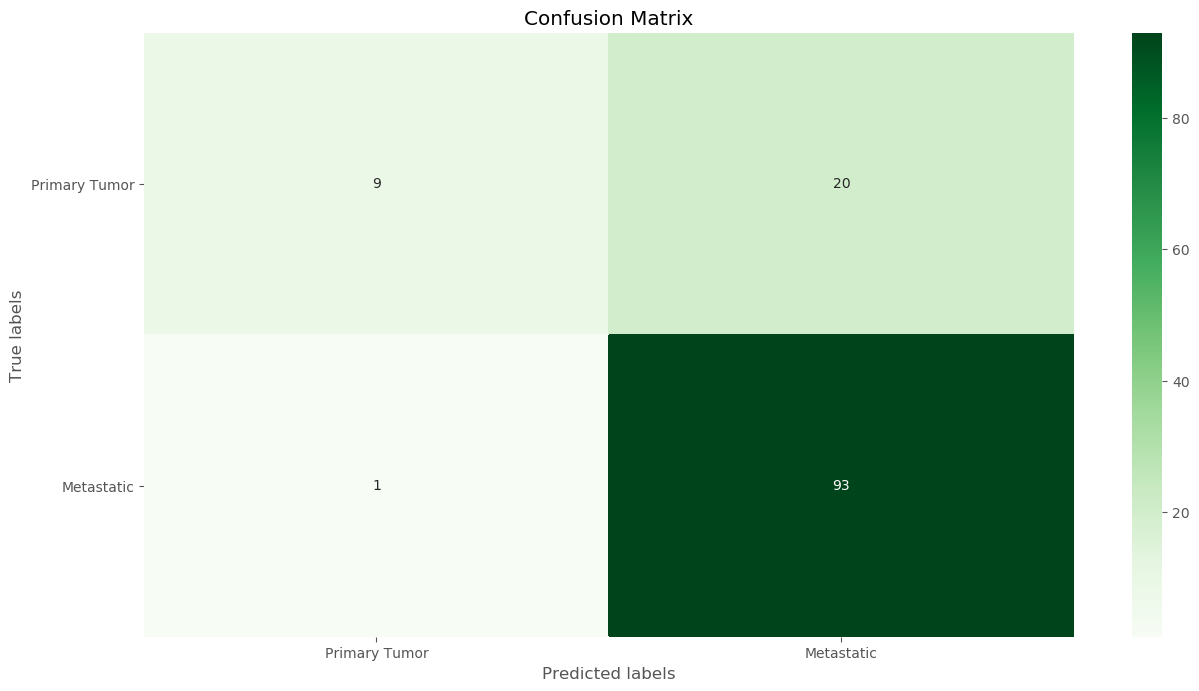

In [10]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top40_features, 
    label_binarizer = False)

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_ppi_lr_40_genes_classifier.pkl', compress=9)